In [45]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense , Dropout

/kaggle/input/weather/historical_weather.csv


In [3]:
data = pd.read_csv('/kaggle/input/weather/historical_weather.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710802 entries, 0 to 1710801
Data columns (total 18 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   datetime                object 
 1   temperature             float64
 2   dewpoint                float64
 3   rain                    float64
 4   snowfall                float64
 5   surface_pressure        float64
 6   cloudcover_total        int64  
 7   cloudcover_low          int64  
 8   cloudcover_mid          int64  
 9   cloudcover_high         int64  
 10  windspeed_10m           float64
 11  winddirection_10m       int64  
 12  shortwave_radiation     float64
 13  direct_solar_radiation  float64
 14  diffuse_radiation       float64
 15  latitude                float64
 16  longitude               float64
 17  data_block_id           float64
dtypes: float64(12), int64(5), object(1)
memory usage: 234.9+ MB


In [5]:
data.isnull().sum()

datetime                  0
temperature               0
dewpoint                  0
rain                      0
snowfall                  0
surface_pressure          0
cloudcover_total          0
cloudcover_low            0
cloudcover_mid            0
cloudcover_high           0
windspeed_10m             0
winddirection_10m         0
shortwave_radiation       0
direct_solar_radiation    0
diffuse_radiation         0
latitude                  0
longitude                 0
data_block_id             0
dtype: int64

In [6]:
data.head()

,datetime,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,data_block_id
0,2021-09-01 00:00:00,14.2,11.6,0.0,0.0,1015.9,31,31,0,11,7.083333,8,0.0,0.0,0.0,57.6,21.7,1.0
1,2021-09-01 00:00:00,13.9,11.5,0.0,0.0,1010.7,33,37,0,0,5.111111,359,0.0,0.0,0.0,57.6,22.2,1.0
2,2021-09-01 00:00:00,14.0,12.5,0.0,0.0,1015.0,31,34,0,0,6.333333,355,0.0,0.0,0.0,57.6,22.7,1.0
3,2021-09-01 00:00:00,14.6,11.5,0.0,0.0,1017.3,0,0,0,0,8.083333,297,358.0,277.0,81.0,57.6,23.2,1.0
4,2021-09-01 00:00:00,15.7,12.9,0.0,0.0,1014.0,22,25,0,0,8.416667,5,0.0,0.0,0.0,57.6,23.7,1.0


In [72]:
sampled_data = data.sample(500000, random_state=42)

In [73]:
sampled_data = sampled_data[['temperature', 'dewpoint', 'rain', 'snowfall',
       'surface_pressure', 'cloudcover_total', 'cloudcover_low',
       'cloudcover_mid', 'cloudcover_high', 'windspeed_10m',
       'winddirection_10m', 'shortwave_radiation', 'direct_solar_radiation',
       'diffuse_radiation']]

In [74]:
corr_matrix = sampled_data.corr()

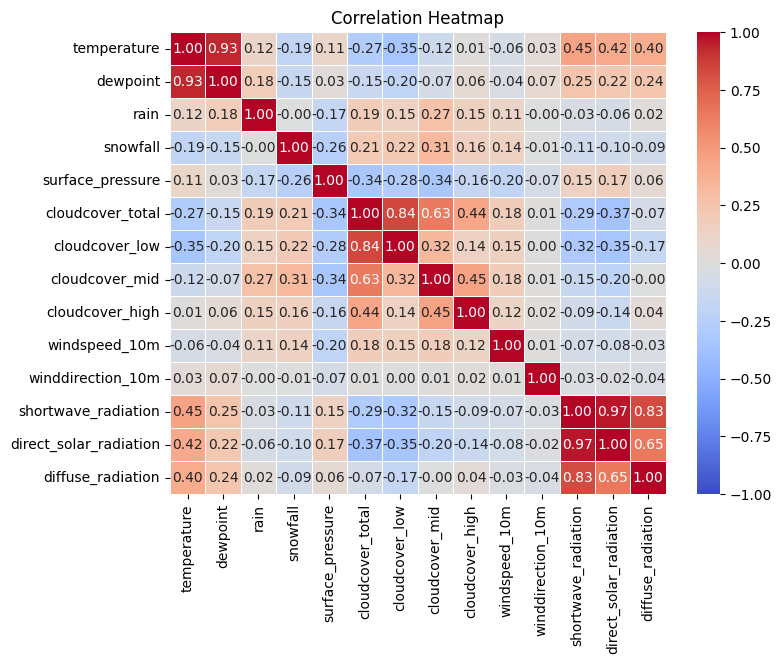

In [75]:
# Generate heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True,fmt=".2f", cmap='coolwarm', linewidths=0.5,vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [76]:
X = sampled_data[['dewpoint', 'rain', 'snowfall', 'surface_pressure', 'shortwave_radiation','direct_solar_radiation', 'diffuse_radiation']]
y = sampled_data['temperature']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [78]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [15]:
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [21]:
train_score = rf.score(X_train_scaled, y_train)
test_score = rf.score(X_test_scaled, y_test)

print(f"Training score: {train_score}")
print(f"Testing score: {test_score}")

Training score: 0.9884054428164961
Testing score: 0.9280028070535833


In [22]:
y_train_pred = rf.predict(X_train_scaled)
y_test_pred = rf.predict(X_test_scaled)

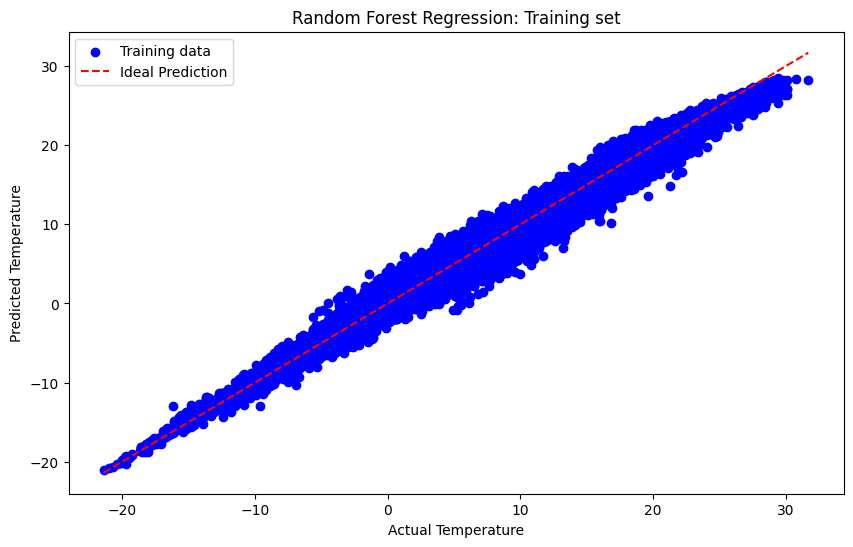

In [23]:
# Scatter plot for training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Training data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--', color='red', label='Ideal Prediction')
plt.title('Random Forest Regression: Training set')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.legend()
plt.show()

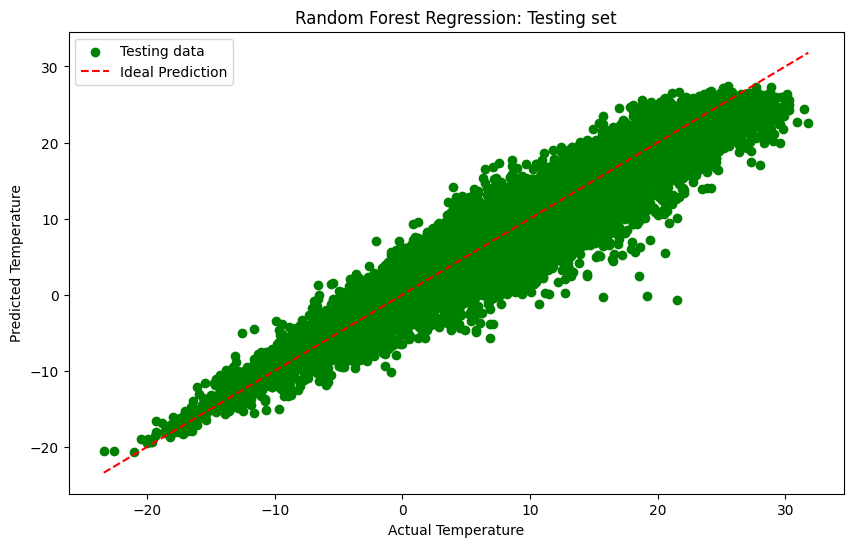

In [24]:
# Scatter plot for testing set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='green', label='Testing data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Ideal Prediction')
plt.title('Random Forest Regression: Testing set')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.legend()
plt.show()

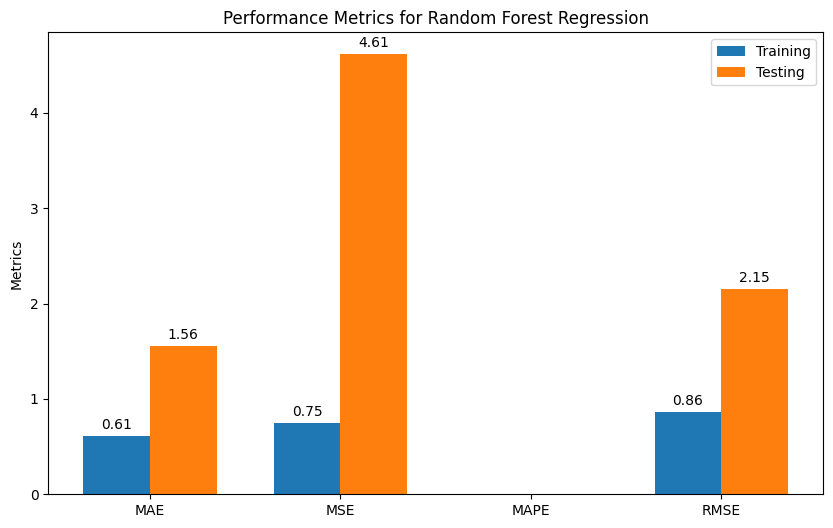

In [26]:
# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Plotting
labels = ['MAE', 'MSE', 'MAPE', 'RMSE']
training_values = [mae_train, mse_train, mape_train, rmse_train]
testing_values = [mae_test, mse_test, mape_test, rmse_test]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, training_values, width, label='Training')
rects2 = ax.bar(x + width/2, testing_values, width, label='Testing')

ax.set_ylabel('Metrics')
ax.set_title('Performance Metrics for Random Forest Regression')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its value."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

In [79]:
# Reshape the data for LSTM input (samples, time steps, features)
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [80]:
# Build the LSTM model with increased complexity
model = Sequential()
model.add(LSTM(100, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(2))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [81]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [86]:
# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_data=(X_test_reshaped, y_test))

Epoch 1/50
10157/10157 ━━━━━━━━━━━━━━━━━━━━ 62s 6ms/step - loss: 4.2288 - val_loss: 4.1921
Epoch 2/50
10157/10157 ━━━━━━━━━━━━━━━━━━━━ 63s 6ms/step - loss: 4.2478 - val_loss: 4.2070
Epoch 3/50
10157/10157 ━━━━━━━━━━━━━━━━━━━━ 62s 6ms/step - loss: 4.2399 - val_loss: 4.1834
Epoch 4/50
10157/10157 ━━━━━━━━━━━━━━━━━━━━ 62s 6ms/step - loss: 4.2259 - val_loss: 4.2006
Epoch 5/50
10157/10157 ━━━━━━━━━━━━━━━━━━━━ 62s 6ms/step - loss: 4.2437 - val_loss: 4.1868
Epoch 6/50
10157/10157 ━━━━━━━━━━━━━━━━━━━━ 62s 6ms/step - loss: 4.2290 - val_loss: 4.1946
Epoch 7/50
10157/10157 ━━━━━━━━━━━━━━━━━━━━ 82s 6ms/step - loss: 4.2273 - val_loss: 4.1982
Epoch 8/50
10157/10157 ━━━━━━━━━━━━━━━━━━━━ 62s 6ms/step - loss: 4.2209 - val_loss: 4.1866
Epoch 9/50
10157/10157 ━━━━━━━━━━━━━━━━━━━━ 62s 6ms/step - loss: 4.2386 - val_loss: 4.1948
Epoch 10/50
10157/10157 ━━━━━━━━━━━━━━━━━━━━ 62s 6ms/step - loss: 4.2410 - val_loss: 4.1964
Epoch 11/50
10157/10157 ━━━━━━━━━━━━━━━━━━━━ 62s 6ms/step - loss: 4.2129 - val_loss: 4.18

In [87]:
# Evaluate the model
train_loss = model.evaluate(X_train_reshaped, y_train, verbose=0)
test_loss = model.evaluate(X_test_reshaped, y_test, verbose=0)

In [88]:
print(f"Training loss: {train_loss}")
print(f"Testing loss: {test_loss}")

Training loss: 4.057572841644287
Testing loss: 4.162705898284912


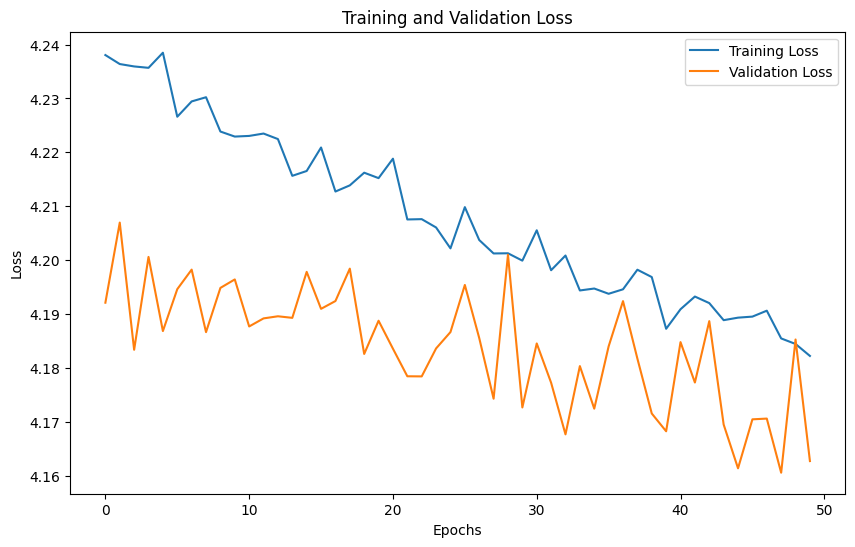

In [89]:
# Plot training and validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()